# Brazilian e-Commerce: Customer Segmentation
## Created by: Mohammad Lutfi Mahatir

### **BUSINESS PROBLEM UNDERSTANDING**

**Context:**

Olist merupakan sebuah e-commerce asal Brasil yang menghubungkan penjual dan pembeli secara online. Selain menjadi tempat bertemunya penjual dan pembeli, Olist memiliki beberapa fitur untuk menunjang fungsi platformnya, seperti integrasi dengan berbagai pasar e-commerce, pemrosesan pembayaran, dan pengiriman produk. 

Olist baru saja mendapatkan funding yang terbilang besar dan cukup untuk mendanai sebuah campaign marketing untuk semakin mendapatkan pangsa pasar yang lebih luas dan dapat meningkatkan revenur. Di tengah persaingan pasar yang semakin ketat serta untuk mempertahankan posisi di pasar yang semakin kompetitif, tim marketing Olist ingin melakukan sebuah penetrasi pasar kepada segmen yang masih kecil atau belum banyak dimasuki sehingga market share Olist bisa menjadi lebih besar dan seiring berjalannya waktu dapat meningkatkan pendapatan Olist.

**Problem Statement :**

Penetrasi pasar yang ingin dilakukan Olist dapat tercapai dengan meneliti lebih lanjut purchasing power di platform Olist yang terbilang sangat bervariasi.

Oleh karena itu tim marketing Olist akan bekerja sama dengan tim data untuk dapat mensegmentasikan pelanggan berdasarkan purchasing power mereka sehingga dapat menciptakan strategi pemasaran yang tepat dan menyesuaikan layanan yang diberikan kepada pelanggan.

**Goals :**

- Memahami profil dan customer behaviour di platform Olist.
- Mendapatkan segmentasi pelanggan yang tepat.
- Menciptakan strategi pemasaran Olist dengan mempertimbangkan customer behaviour dan purchasing power pelanggan yang berbeda-beda.

**Analytic Approach :**

Untuk mencapai tujuan di atas, berikut adalah beberapa analisis dan teknik yang bisa dilakukan:

- Pengelompokan pelanggan (clustering) untuk memahami perilaku pembelian yang berbeda-beda.
- Validasi cluster dengan memeriksa perbedaan karakteristik antara kelompok.

**Metric Evaluation**

Untuk mengevaluasi hasil segmentasi, beberapa metrik evaluasi yang bisa digunakan antara lain:

- Silhouette Score untuk mengevaluasi kualitas cluster.

### **Data Understanding**

In [97]:
# Import library yang dibutuhkan untuk eksplorasi dataset
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [98]:
# Load Dataset
customers_df = pd.read_csv('olist_customers_dataset.csv')
orders_df = pd.read_csv('olist_orders_dataset.csv')
items_df = pd.read_csv('olist_order_items_dataset.csv')
products_df = pd.read_csv('olist_products_dataset.csv')
sellers_df = pd.read_csv('olist_sellers_dataset.csv')
reviews_df = pd.read_csv('olist_order_reviews_dataset.csv')
payments_df = pd.read_csv('olist_order_payments_dataset.csv')
geolocation_df = pd.read_csv('olist_geolocation_dataset.csv')
categories_df = pd.read_csv('product_category_name_translation.csv')

In [99]:
# Menampilkan tiap dataset
display(customers_df.head(2))
display(orders_df.head(2))
display(items_df.head(2))
display(products_df.head(2))
display(sellers_df.head(2))
display(reviews_df.head(2))
display(payments_df.head(2))
display(geolocation_df.head(2))
display(categories_df.head(2))

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories


Berdasarkan dataset di atas, terdapat nama kategori produk dengan bahasa brasil dan bahasa inggris.

Oleh karena itu, kita akan menggunakan nama kategori produk bahasa inggris saja dan akan drop nama kategori produk dengan bahasa brasil.

**Merge categories_df and product_df dataframes to use the English names**

In [101]:
# products_df contains 73 unique categories, while categories_df contains 71: that's why we use left, 
# for missing categories we keep the category name in Latin.
products = pd.merge(products_df, categories_df, on='product_category_name', how='left')

# Delete 'product_category_name' column
del products['product_category_name']

# Delete  the categories_df dataframe
del categories_df

# Rename the column
products.rename(columns={'product_category_name_english': 'product_category'}, inplace=True)

**Merge Dataset**

In [170]:
# Merge dataset
df = pd.merge(orders_df, customers_df, on='customer_id')
df = df.merge(items_df, on='order_id')
df = df.merge(payments_df, on='order_id')
df = df.merge(products, on='product_id')

In [171]:
# Menampilkan dataset yang telah digabungkan
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,payment_installments,payment_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,1,18.12,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,1,2.00,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,1,18.59,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,3a51803cc0d012c3b5dc8b7528cb05f7,3366,...,3,37.77,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,ef0996a1a279c26e7ecbd737be23d235,2290,...,1,37.77,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares


In [182]:
# Membuat duplikat dataframe
dfa = df.copy()

In [183]:
# Cek info lebih detail untuk setiap fitur
listItem = []

for col in dfa.columns:
    listItem.append([col, dfa[col].dtype, dfa[col].isna().sum(), round((dfa[col].isna().sum()/len(dfa[col]))*100, 2),
                    dfa[col].nunique(), list(dfa[col].drop_duplicates().sample(2).values)]);

dfa_desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfa_desc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,order_id,object,0,0.00,98665,"[f7abaa156e535f9204ac0cedab166bd0, 24ac51b02d0..."
1,customer_id,object,0,0.00,98665,"[ce77075ed8a9f941a7d9a3f6e6aaffb9, 9dd11f3718d..."
2,order_status,object,0,0.00,7,"[unavailable, invoiced]"
3,order_purchase_timestamp,object,0,0.00,98111,"[2017-06-25 12:07:00, 2018-08-08 15:16:18]"
4,order_approved_at,object,15,0.01,90173,"[2018-03-10 18:35:24, 2017-03-31 13:42:18]"
5,order_delivered_carrier_date,object,1245,1.06,81016,"[2018-07-05 07:38:00, 2017-08-08 19:11:59]"
6,order_delivered_customer_date,object,2567,2.18,95663,"[2018-08-09 15:58:54, 2018-06-25 19:08:40]"
7,order_estimated_delivery_date,object,0,0.00,449,"[2017-10-13 00:00:00, 2017-04-06 00:00:00]"
8,customer_unique_id,object,0,0.00,95419,"[08ec224851e26450be6ac8cdb0a7c906, 89e66485ae8..."
9,customer_zip_code_prefix,int64,0,0.00,14976,"[4458, 23810]"


- dapat terlihat berdasarkan informasi di atas bahwa beberapa kolom memiliki missing values.
- untuk mengatasi hal tersebut, beberapa baris yang memiliki missing values akan di drop.

### **Data Preprocessing**

In [184]:
# Drop kolom yang tidak dibutuhkan
dfa = dfa.drop(['customer_id', 'customer_zip_code_prefix', 
               'seller_id', 'shipping_limit_date', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 
               'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm'], axis=1)

In [185]:
# Menghapus missing values
dfa.dropna(inplace=True)

In [186]:
# Memeriksa missing values
dfa.isnull().sum().sort_values(ascending=True)

order_id                         0
payment_installments             0
payment_type                     0
payment_sequential               0
freight_value                    0
price                            0
product_id                       0
order_item_id                    0
payment_value                    0
customer_state                   0
customer_unique_id               0
order_estimated_delivery_date    0
order_delivered_customer_date    0
order_delivered_carrier_date     0
order_approved_at                0
order_purchase_timestamp         0
order_status                     0
customer_city                    0
product_category                 0
dtype: int64

- Data sudah tidak memiliki missing values

In [187]:
# Menampilkan informasi mengenai tipe data
dfa.shape

(113368, 19)

In [188]:
# Memeriksa duplikat
dfa.duplicated().sum()

0

- Data tidak memiliki duplikat

In [112]:
# convert date columns to datetime format
dfa['order_purchase_timestamp'] = pd.to_datetime(dfa['order_purchase_timestamp'])
dfa['order_approved_at'] = pd.to_datetime(dfa['order_approved_at'])
dfa['order_delivered_carrier_date'] = pd.to_datetime(dfa['order_delivered_carrier_date'])
dfa['order_delivered_customer_date'] = pd.to_datetime(dfa['order_delivered_customer_date'])
dfa['order_estimated_delivery_date'] = pd.to_datetime(dfa['order_estimated_delivery_date'])

In [113]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113368 entries, 0 to 117600
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_status                   113368 non-null  object        
 1   order_purchase_timestamp       113368 non-null  datetime64[ns]
 2   order_approved_at              113368 non-null  datetime64[ns]
 3   order_delivered_carrier_date   113368 non-null  datetime64[ns]
 4   order_delivered_customer_date  113368 non-null  datetime64[ns]
 5   order_estimated_delivery_date  113368 non-null  datetime64[ns]
 6   customer_unique_id             113368 non-null  object        
 7   customer_city                  113368 non-null  object        
 8   customer_state                 113368 non-null  object        
 9   order_item_id                  113368 non-null  int64         
 10  product_id                     113368 non-null  object        
 11  

In [114]:
# Cek info lebih detail untuk setiap fitur
listItem = []

for col in dfa.columns:
    listItem.append([col, dfa[col].dtype, dfa[col].isna().sum(), round((dfa[col].isna().sum()/len(dfa[col]))*100, 2),
                    dfa[col].nunique(), list(dfa[col].drop_duplicates().sample(2).values)]);

dfa_desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfa_desc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,order_status,object,0,0.0,2,"[canceled, delivered]"
1,order_purchase_timestamp,datetime64[ns],0,0.0,94606,"[2017-08-30T11:34:58.000000000, 2018-07-30T17:..."
2,order_approved_at,datetime64[ns],0,0.0,87113,"[2017-11-25T15:59:25.000000000, 2017-08-22T18:..."
3,order_delivered_carrier_date,datetime64[ns],0,0.0,78910,"[2017-09-11T19:35:45.000000000, 2017-10-17T13:..."
4,order_delivered_customer_date,datetime64[ns],0,0.0,94322,"[2018-05-14T16:07:42.000000000, 2018-08-30T21:..."
5,order_estimated_delivery_date,datetime64[ns],0,0.0,444,"[2017-03-20T00:00:00.000000000, 2017-09-15T00:..."
6,customer_unique_id,object,0,0.0,92063,"[70d9c1727c10dc6cd4187548784084bf, 51bca9fb39b..."
7,customer_city,object,0,0.0,4073,"[areia branca, indiara]"
8,customer_state,object,0,0.0,27,"[AL, GO]"
9,order_item_id,int64,0,0.0,21,"[9, 11]"


`dfa` akan menjadi data yang akan kita gunakan untuk Exploratory Data Analysis di bawah.

#### **Exploratory Data Analysis**

#### **Mayoritas pelanggan berada**

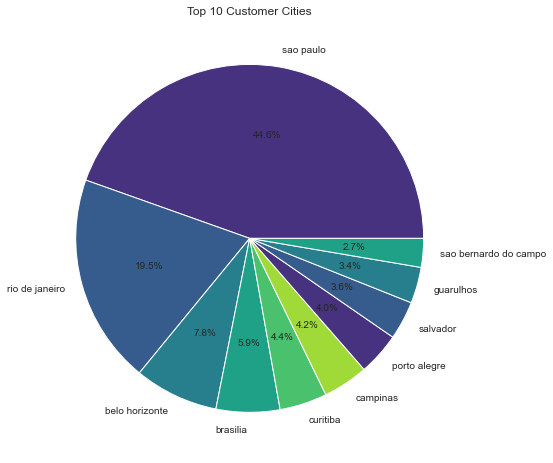

In [163]:
# Plot the pie chart of customer cities
plt.figure(figsize=(8,8))
city_counts = dfa['customer_city'].value_counts().head(10)
plt.pie(city_counts, labels=city_counts.index, autopct='%1.1f%%')
plt.title('Top 10 Customer Cities')
plt.show()

Berdasarkan visualisasi di atas, mayoritas customer kita berada pada Sao Paulo dan Rio De Janeiro.

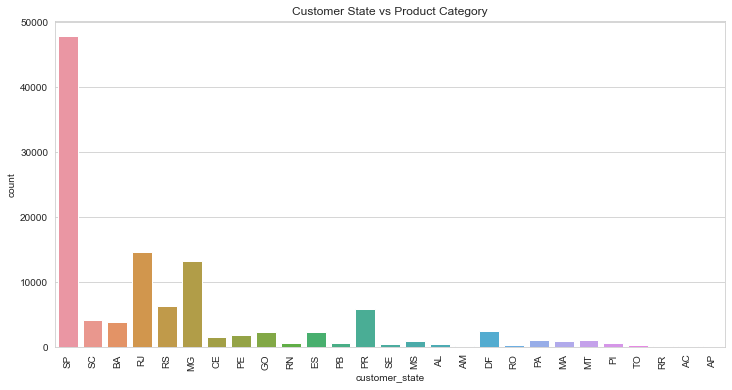

In [117]:
# Plot the bar chart of customer state vs product category
plt.figure(figsize=(12,6))
sns.countplot(x='customer_state', data=dfa)
plt.xticks(rotation=90)
plt.title('Customer State vs Product Category')
plt.show()

Berdasarkan analisa sebelumnya di atas yang menunjukan bahwa mayoritas customer kita berada di Sao Paulo dan Rio De Janeiro, hal tersebut juga sejalan dengan analisa di atas.

Visualisasi di atas menunjukan bahwa banyak product category yang terjual juga ke Sao Paulo.

#### **Tahun dengan jumlah order terbanyak**

In [191]:
# Membagi value pada kolom waktu menjadi tahun, bulan, hari, dan jam 
dfa['order_purchase_year'] = pd.to_datetime(df['order_purchase_timestamp']).dt.year
dfa['order_purchase_month'] = pd.to_datetime(df['order_purchase_timestamp']).dt.month
dfa['order_purchase_day'] = pd.to_datetime(df['order_purchase_timestamp']).dt.day
dfa['order_purchase_hour'] = pd.to_datetime(df['order_purchase_timestamp']).dt.hour

# Number of orders per year and month
orders = dfa[['order_id', 'order_purchase_year', 'order_purchase_month']]
orders = orders.groupby(['order_purchase_month', 'order_purchase_year']).count().reset_index()
orders = orders.sort_values(by=['order_purchase_year', 'order_purchase_month'])
orders["period"] =  orders["order_purchase_month"].astype(str) + "/" + orders["order_purchase_year"].astype(str)
orders

,order_purchase_month,order_purchase_year,order_id,period
17,10,2016,334,10/2016
20,12,2016,1,12/2016
0,1,2017,949,1/2017
2,2,2017,1893,2/2017
4,3,2017,3014,3/2017
6,4,2017,2628,4/2017
8,5,2017,4161,5/2017
10,6,2017,3627,6/2017
12,7,2017,4655,7/2017
14,8,2017,4974,8/2017


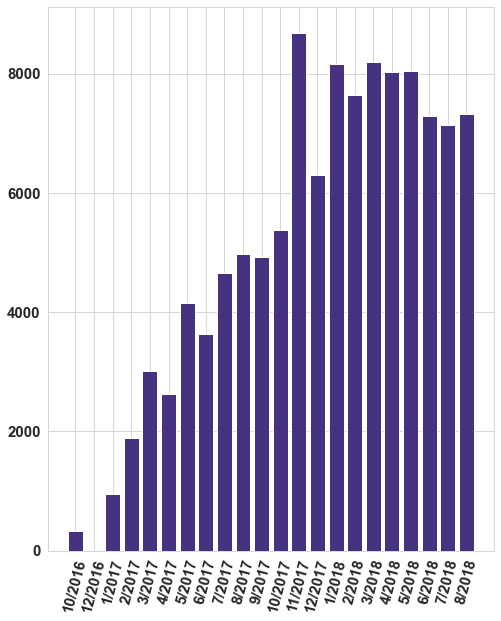

In [193]:
plt.figure(figsize=(8,10))
plt.bar(orders['period'], orders['order_id'])
plt.xticks(rotation=75, fontsize=15, weight='bold')
plt.yticks(fontsize=15, weight='bold')
plt.show()

Dapat dilihat dari visualisasi di atas bahwa tahun 2018 merupakan tahun dengan order terbanyak dibandingkan tahun 2016 dan tahun 2017. Hal tersebut bisa konfirmasi dengan tabel di bawah:

In [195]:
orders.groupby(['order_purchase_year']).sum()

,order_purchase_month,order_id
order_purchase_year,,
2016,22,335
2017,78,51192
2018,36,61841


#### **Top 10 Categories**

In [196]:
top_categories = df[['product_category', 'order_item_id']]
top_categories = top_categories.groupby(['product_category']).sum().sort_values(by=['order_item_id'], ascending=False).reset_index()
top_categories[:10]

,product_category,order_item_id
0,bed_bath_table,14539
1,furniture_decor,12055
2,health_beauty,11426
3,sports_leisure,10279
4,computers_accessories,10186
5,housewares,9530
6,watches_gifts,6811
7,garden_tools,6129
8,telephony,5349
9,auto,5042


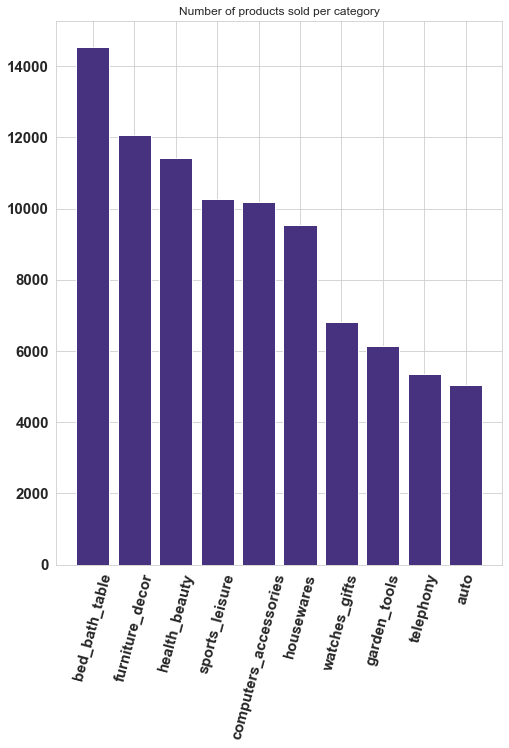

In [198]:
plt.figure(figsize=(8,10))
plt.bar(top_categories['product_category'][:10], top_categories['order_item_id'][:10])
plt.title('Number of products sold per category')
plt.xticks(rotation=75, fontsize=15, weight='bold')
plt.yticks(fontsize=15, weight='bold')
plt.show()

Top 10 category dengan produk terbanyak dibeli pada posisi 1 sampai 3 ada pada `bed_bath_table`, `furniture_decor`, dan `health_beauty`.

### **Create Dataset: Feature Enginering**

In [118]:
# Drop beberapa kolom waktu
dfa = dfa.drop(['order_approved_at', 'order_purchase_timestamp', 'order_delivered_carrier_date', 
             'order_delivered_customer_date', 'order_estimated_delivery_date'], axis=1)

In [119]:
# Menampilkan data final
dfa

,order_status,customer_unique_id,customer_city,customer_state,order_item_id,product_id,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,product_category,order_purchase_year,order_purchase_month,order_purchase_day,order_purchase_hour
0,delivered,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,1,87285b34884572647811a353c7ac498a,29.99,8.72,1,credit_card,1,18.12,housewares,2017,10,2,10
1,delivered,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,1,87285b34884572647811a353c7ac498a,29.99,8.72,3,voucher,1,2.00,housewares,2017,10,2,10
2,delivered,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,1,87285b34884572647811a353c7ac498a,29.99,8.72,2,voucher,1,18.59,housewares,2017,10,2,10
3,delivered,3a51803cc0d012c3b5dc8b7528cb05f7,sao paulo,SP,1,87285b34884572647811a353c7ac498a,29.99,7.78,1,credit_card,3,37.77,housewares,2017,8,15,18
4,delivered,ef0996a1a279c26e7ecbd737be23d235,sao paulo,SP,1,87285b34884572647811a353c7ac498a,29.99,7.78,1,credit_card,1,37.77,housewares,2017,8,2,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117596,delivered,fb9310710003399b031add3e55f34719,sao paulo,SP,1,0df37da38a30a713453b03053d60d3f7,356.00,18.12,1,credit_card,10,748.24,sports_leisure,2017,8,10,21
117597,delivered,fb9310710003399b031add3e55f34719,sao paulo,SP,2,0df37da38a30a713453b03053d60d3f7,356.00,18.12,1,credit_card,10,748.24,sports_leisure,2017,8,10,21
117598,delivered,a49e8e11e850592fe685ae3c64b40eca,campo do tenente,PR,1,3d2c44374ee42b3003a470f3e937a2ea,55.90,15.14,1,credit_card,1,71.04,musical_instruments,2017,12,20,9
117599,delivered,6359f309b166b0196dbf7ad2ac62bb5a,sao jose dos campos,SP,1,ac35486adb7b02598c182c2ff2e05254,72.00,13.08,1,credit_card,3,85.08,health_beauty,2017,3,9,9


In [120]:
# Menyeleksi feature yang akan digunakan untuk modeling
columns = ['price', 'freight_value', 'payment_value']
dfa_model = dfa[columns]
dfa_model.head()

,price,freight_value,payment_value
0,29.99,8.72,18.12
1,29.99,8.72,2.00
2,29.99,8.72,18.59
3,29.99,7.78,37.77
4,29.99,7.78,37.77


In [121]:
# Cek info lebih detail untuk setiap fitur
listItem = []

for col in dfa_model.columns:
    listItem.append([col, dfa_model[col].dtype, dfa_model[col].isna().sum(), round((dfa_model[col].isna().sum()/len(dfa_model[col]))*100, 2),
                    dfa_model[col].nunique(), list(dfa_model[col].drop_duplicates().sample(2).values)]);

dfa_desc_model = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfa_desc_model

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,price,float64,0,0.0,5790,"[120.49, 53.88]"
1,freight_value,float64,0,0.0,6902,"[56.31, 96.84]"
2,payment_value,float64,0,0.0,28374,"[118.7, 566.4]"


### **Scaling Data**

In [122]:
# Import library
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA

In [123]:
# Melakukan scaling
scaller = StandardScaler()

df_prepared = scaller.fit_transform(dfa_model)
df_prepared

array([[-0.49338444, -0.71758716, -0.57802834],
       [-0.49338444, -0.71758716, -0.63848741],
       [-0.49338444, -0.71758716, -0.57626558],
       ...,
       [-0.35163916, -0.31005086, -0.3795486 ],
       [-0.26356124, -0.44081796, -0.32689071],
       [-0.28270861, -0.10564792, -0.32021471]])

In [124]:
# Mengubah value yang sudah berada di pipeline ke dalam dataframe
df_prepared = pd.DataFrame(df_prepared)

In [125]:
# Menampilkan data yang akan dijadikan model
df_prepared

,0,1,2
0,-0.493384,-0.717587,-0.578028
1,-0.493384,-0.717587,-0.638487
2,-0.493384,-0.717587,-0.576266
3,-0.493384,-0.777258,-0.504330
4,-0.493384,-0.777258,-0.504330
...,...,...,...
113363,1.290111,-0.120883,2.160332
113364,1.290111,-0.120883,2.160332
113365,-0.351639,-0.310051,-0.379549
113366,-0.263561,-0.440818,-0.326891


In [126]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Mencari best K
n_clusters = [3, 4, 5, 7]
silhouette_scores = []

for K in n_clusters:
    initialized_clusters = KMeans(n_clusters = K, random_state = 10)
    data_fitted_clusters = initialized_clusters.fit_predict(df_prepared)
    silhoette_score = silhouette_score(df_prepared, data_fitted_clusters, random_state = 10)
    silhouette_scores.append(silhoette_score)

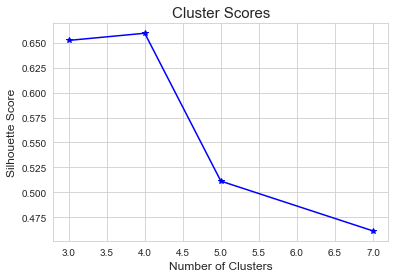

In [141]:
# Membuat plot untuk menampilkan best K yang sudah kita buat di atas
plt.plot(n_clusters, silhouette_scores, color = 'b', marker = '*')
plt.title('Cluster Scores', fontsize = 15)
plt.xlabel('Number of Clusters', fontsize = 12)
plt.ylabel('Silhouette Score', fontsize = 12)
plt.show()

In [142]:
# Final model

df_final = KMeans(n_clusters=4, random_state=10)
df_final.fit(df_prepared)

KMeans(n_clusters=4, random_state=10)

In [143]:
# Menambahkan kolom 'cluster' ke dalam dataframe untuk modeling
data_output = df_prepared.copy()
data_output['Cluster'] = df_final.labels_
data_output.sample(5)

,0,1,2,Cluster
49210,-0.594264,-0.268789,-0.543448,1
18915,0.321801,1.630507,0.196800,3
65324,0.436631,0.265070,0.194850,1
103777,-0.504818,-0.312590,-0.484714,1
43830,-0.088554,0.259992,-0.165504,1


In [144]:
# Membuat dataframe untuk menciptakan plot PCA
pca = PCA(n_components = 4)
x_pca = pca.fit_transform(data_output)
df_pca = pd.DataFrame(x_pca, data_output['Cluster'])
df_pca.reset_index(inplace=True)
df_pca

,Cluster,0,1,2,3
0,1,-1.011623,0.211531,-0.068917,-0.148662
1,1,-1.048433,0.189455,-0.111338,-0.144999
2,1,-1.010550,0.212175,-0.067680,-0.148769
3,1,-0.995788,0.284138,-0.017958,-0.178204
4,1,-0.995788,0.284138,-0.017958,-0.178204
...,...,...,...,...,...
113363,0,1.968646,1.727162,0.520602,0.564681
113364,0,1.968646,1.727162,0.520602,0.564681
113365,1,-0.604479,0.014630,-0.024929,-0.010458
113366,1,-0.581371,0.160546,-0.052018,-0.081672


Text(0, 0.5, 'Komponen 2')

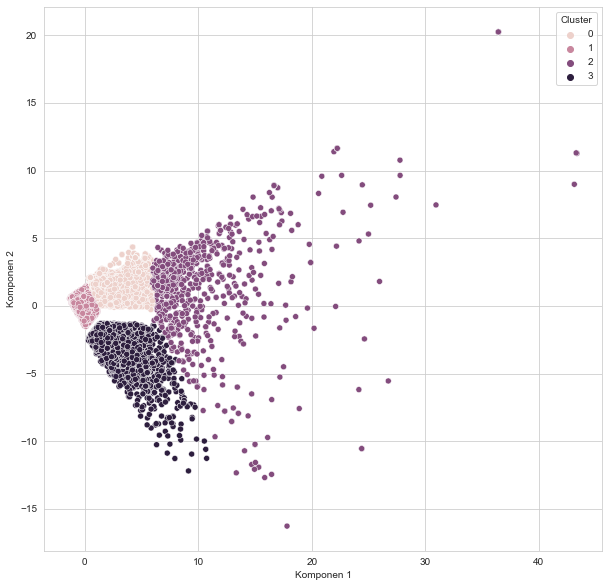

In [145]:
# Membuat plot yang akan menampilkan bentuk clustering
plt.figure(figsize=(10,10))
sns.scatterplot(
    x_pca[:,0],
    x_pca[:,1],
    hue= df_pca['Cluster']
)

plt.xlabel('Komponen 1')
plt.ylabel('Komponen 2')

In [146]:
# Menggabungkan kolom 'cluster' ke dalam dataframe yang akan kita gunakan untuk cluster analysis
df_final = pd.merge(dfa, data_output[['Cluster']], left_index=True, right_index=True)

In [147]:
# Menampilkan dataframe
df_final

,order_status,customer_unique_id,customer_city,customer_state,order_item_id,product_id,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,product_category,order_purchase_year,order_purchase_month,order_purchase_day,order_purchase_hour,Cluster
0,delivered,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,1,87285b34884572647811a353c7ac498a,29.99,8.72,1,credit_card,1,18.12,housewares,2017,10,2,10,1
1,delivered,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,1,87285b34884572647811a353c7ac498a,29.99,8.72,3,voucher,1,2.00,housewares,2017,10,2,10,1
2,delivered,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,1,87285b34884572647811a353c7ac498a,29.99,8.72,2,voucher,1,18.59,housewares,2017,10,2,10,1
3,delivered,3a51803cc0d012c3b5dc8b7528cb05f7,sao paulo,SP,1,87285b34884572647811a353c7ac498a,29.99,7.78,1,credit_card,3,37.77,housewares,2017,8,15,18,1
4,delivered,ef0996a1a279c26e7ecbd737be23d235,sao paulo,SP,1,87285b34884572647811a353c7ac498a,29.99,7.78,1,credit_card,1,37.77,housewares,2017,8,2,18,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113363,delivered,8daed8656ebd5207d291f66538455e05,valinhos,SP,1,5fedaa257cce9d3db6da91f9cfd815c1,30.00,8.82,1,credit_card,1,77.64,baby,2018,5,7,12,0
113364,delivered,8daed8656ebd5207d291f66538455e05,valinhos,SP,2,5fedaa257cce9d3db6da91f9cfd815c1,30.00,8.82,1,credit_card,1,77.64,baby,2018,5,7,12,0
113365,delivered,a28a5bf286affa0abc5f7dbc1ccb6a2d,brasilia,DF,1,bf379ee1c9b696f70f97027e92279497,29.90,14.10,1,credit_card,4,44.00,housewares,2017,11,12,12,1
113366,delivered,eaa62b5b7b97dfc5b7f233e7ca718d7d,fazenda rio grande,PR,1,8df319d9f48776cb857c83625848367e,135.00,16.05,1,boleto,1,151.05,computers_accessories,2018,8,7,14,1


### **Cluster Analysis**

#### **How many customers are present in each cluster?**

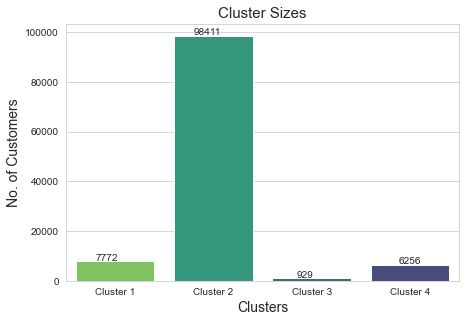

In [149]:
# Menampilkan plot
sns.countplot(data = data_output, x = 'Cluster', palette = 'viridis_r')
plt.title('Cluster Sizes', fontsize = 15)
plt.xlabel('Clusters', fontsize = 14)
plt.ylabel('No. of Customers', fontsize = 14)
plt.xticks([0, 1, 2, 3], ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'], rotation = 0)
plt.text(x = 0 - 0.2, y = data_output.Cluster.value_counts()[0] + 500, s = data_output.Cluster.value_counts()[0])
plt.text(x = 1 - 0.2, y = data_output.Cluster.value_counts()[1] + 500, s = data_output.Cluster.value_counts()[1])
plt.text(x = 2 - 0.15, y = data_output.Cluster.value_counts()[2] + 500, s = data_output.Cluster.value_counts()[2])
plt.text(x = 3 - 0.12, y = data_output.Cluster.value_counts()[3] + 500, s = data_output.Cluster.value_counts()[3])
plt.tight_layout(pad = -1)
plt.show()

- Dari bar chart di atas, dapat diketahui bahwa kebanyakan consumen berada pada cluster 2. Sedangkan cluster 3 hanya memiliki 929 customer, dan cluster 1 dan 4 memiliki 7772 dan 6256 customer.

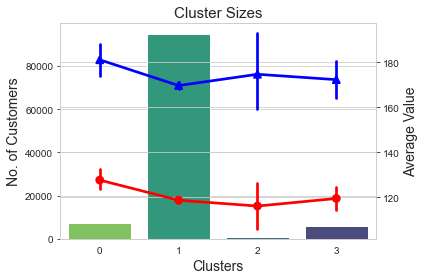

In [150]:
# visualisasi jumlah pelanggan di setiap klaster
sns.countplot(data=df_final, x='Cluster', palette='viridis_r')
plt.title('Cluster Sizes', fontsize=15)
plt.xlabel('Clusters', fontsize=14)
plt.ylabel('No. of Customers', fontsize=14)
plt.xticks([0, 1, 2, 3], ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'], rotation=0)

# menambahkan label rata-rata nilai 'price' dan 'payment_value' pada setiap klaster
ax1 = plt.twinx()
sns.pointplot(data=df_final, x='Cluster', y='price', ax=ax1, color='red', markers='o')
sns.pointplot(data=df_final, x='Cluster', y='payment_value', ax=ax1, color='blue', markers='^')
ax1.set_ylabel('Average Value', fontsize=14)

plt.tight_layout()
plt.show()

Berdasarkan visualisasi, Cluster 4 memiliki nilai rata-rata pembelian tertinggi baik untuk nilai 'price' maupun 'payment_value'. Sedangkan Cluster 3 memiliki nilai rata-rata pembelian terendah. Cluster 1 dan 2 memiliki nilai rata-rata yang hampir sama untuk 'price' dan 'payment_value'.

Secara umum, dapat dilihat bahwa terdapat perbedaan signifikan dalam nilai pembelian antar cluster. Hal ini menunjukkan adanya perbedaan dalam tingkat daya beli dan preferensi pembelian antar pelanggan dalam setiap cluster.

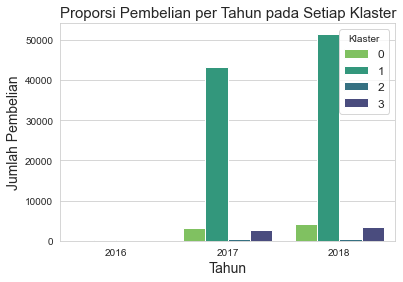

In [151]:
# Visualisasi proporsi pembelian per tahun pada setiap klaster
sns.countplot(data=df_final, x='order_purchase_year', hue='Cluster', palette='viridis_r')
plt.title('Proporsi Pembelian per Tahun pada Setiap Klaster', fontsize=15)
plt.xlabel('Tahun', fontsize=14)
plt.ylabel('Jumlah Pembelian', fontsize=14)
plt.legend(title='Klaster', fontsize=12, loc='upper right')
plt.show()

Dari visualisasi di atas, dapat disimpulkan bahwa tahun 2018 merupakan tahun 'Peak' transaksi pembelian yang dilakukan oleh customer.

Oleh karena itu, kita akan melihat bagaimana tren pembelian dari tiap cluster per setiap bulan di tahun 2018.

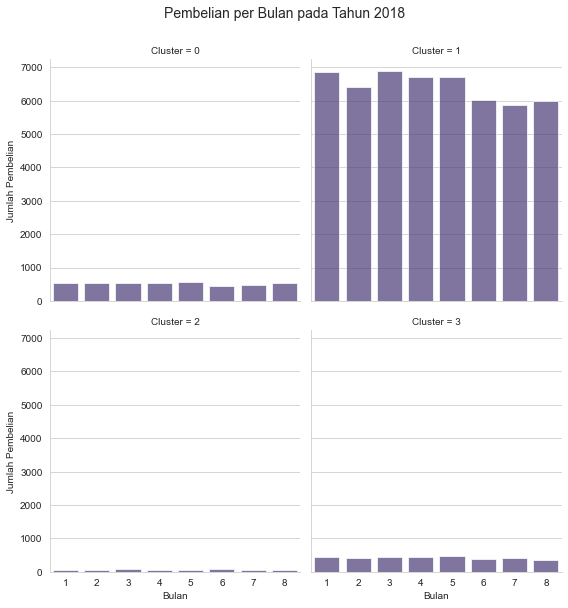

In [152]:
# Filter data untuk tahun 2018
data_2018 = df_final[(df_final['order_purchase_year'] == 2018)]

# Hitung jumlah pembelian di setiap bulan untuk tiap klaster
cluster_month_counts = data_2018.groupby(['Cluster', 'order_purchase_month'])['order_item_id'].count().reset_index()

# Buat plot
sns.set_style('whitegrid')
sns.set_palette('viridis')
g = sns.FacetGrid(cluster_month_counts, col='Cluster', col_wrap=2, height=4, aspect=1)
g.map(sns.barplot, 'order_purchase_month', 'order_item_id', alpha=.7, ci=None)
g.set_axis_labels('Bulan', 'Jumlah Pembelian')
g.fig.suptitle('Pembelian per Bulan pada Tahun 2018', fontsize=14, y=1.05)
plt.show()

Dari visualisasi di atas menunjukkan jumlah pembelian produk pada tiap bulan pada tahun 2018 untuk setiap klaster. Dapat dilihat bahwa tiap klaster memiliki pola pembelian yang berbeda pada tiap bulannya. 

Cluster 1 memiliki jumlah pembelian yang rendah dan tidak stabil di tiap bulannya. Sedangkan Cluster 2 dan Cluster 4 memiliki jumlah pembelian yang relatif stabil di tiap bulannya, namun dengan jumlah yang berbeda-beda. Cluster 3 memiliki jumlah pembelian yang sangat rendah di tiap bulannya, kecuali pada bulan Oktober di mana terjadi peningkatan yang signifikan.

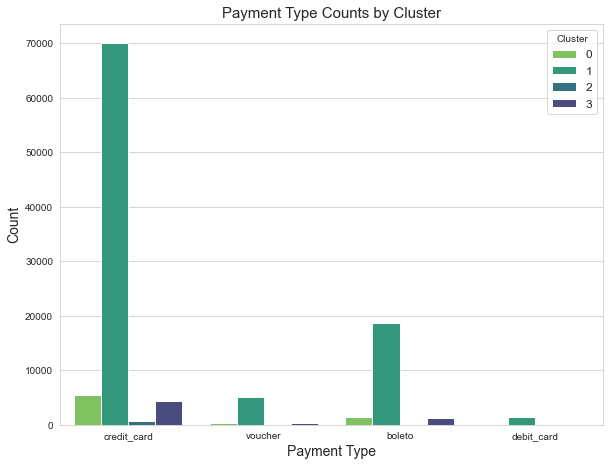

In [153]:
# create a bar plot of payment type counts by cluster
plt.figure(figsize=(8,6))
sns.countplot(x='payment_type', hue='Cluster', data=df_final, palette='viridis_r')
plt.title('Payment Type Counts by Cluster', fontsize=15)
plt.xlabel('Payment Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Cluster', fontsize=12, loc='best')
plt.tight_layout(pad=-1)
plt.show()

Dari visualisasi tersebut, dapat dilihat bahwa di tiap cluster, mayoritas pembayaran dilakukan melalui metode 'credit_card', diikuti dengan 'boleto' dan 'voucher'. Namun, proporsi penggunaan metode pembayaran berbeda-beda di setiap cluster. Cluster 1 dan 4 memiliki proporsi penggunaan 'credit_card' lebih tinggi dibandingkan dengan cluster 2 dan 3 yang memiliki proporsi penggunaan 'boleto' dan 'voucher' yang lebih tinggi.

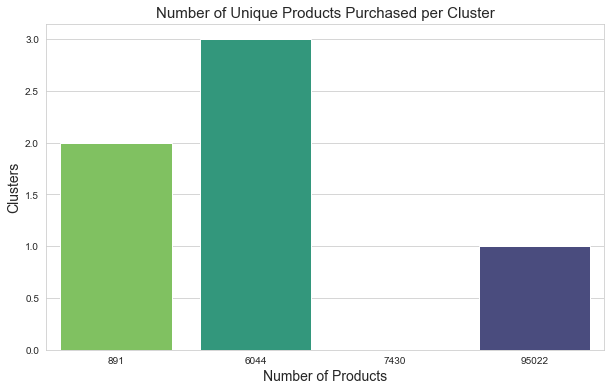

In [157]:
# Count the number of products purchased per cluster
product_counts = df_final.groupby('Cluster')['product_id'].count()

# Create a horizontal bar plot to visualize the results
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
sns.barplot(x=product_counts.values, y=product_counts.index, palette='viridis_r')
plt.title('Number of Unique Products Purchased per Cluster', fontsize=15)
plt.xlabel('Number of Products', fontsize=14)
plt.ylabel('Clusters', fontsize=14)
plt.show()

- Cluster 2 merupakan klaster dengan jumlah produk yang paling banyak dibeli, sedangkan Cluster 3 merupakan klaster dengan jumlah produk yang paling sedikit dibeli.
- Terdapat perbedaan yang signifikan antara jumlah produk yang dibeli oleh Cluster 2 dengan klaster lainnya, terutama dengan Cluster 3 yang memiliki jumlah produk yang paling sedikit dibeli.
- Jumlah produk yang dibeli oleh Cluster 1 dan Cluster 4 relatif seimbang, namun tetap berbeda dengan Cluster 2 yang jauh lebih banyak.

### **Result & Conclusion**

Cluster 1 (7772 customers): Cluster ini memiliki rata-rata jumlah produk yang dibeli, frekuensi pembelian, dan total nilai pembayaran yang relatif rendah dibandingkan dengan cluster lainnya. Hal ini menunjukkan bahwa pelanggan di cluster ini cenderung membeli produk dalam jumlah yang sedikit dan tidak terlalu sering melakukan pembelian. Kebanyakan pelanggan di cluster ini adalah pelanggan yang baru saja bergabung dengan platform e-commerce dan belum melakukan pembelian yang signifikan.

Cluster 2 (96411 customers): Cluster ini adalah cluster terbesar dengan jumlah pelanggan terbanyak. Rata-rata pelanggan di cluster ini membeli produk dalam jumlah yang cukup banyak dan relatif sering melakukan pembelian. Total nilai pembayaran pelanggan di cluster ini juga cukup tinggi. Pelanggan di cluster ini cenderung menjadi pelanggan setia dan aktif dalam melakukan transaksi.

Cluster 3 (929 customers): Cluster ini memiliki jumlah pelanggan yang cukup sedikit. Pelanggan di cluster ini cenderung membeli produk dalam jumlah yang sedikit dan tidak terlalu sering melakukan pembelian. Namun, rata-rata nilai pembayaran pelanggan di cluster ini lebih tinggi dibandingkan dengan cluster 1 dan 4. Hal ini menunjukkan bahwa meskipun pembelian yang dilakukan tidak terlalu sering, namun pelanggan di cluster ini cenderung membeli produk dengan nilai yang lebih tinggi.

Cluster 4 (6256 customers): Cluster ini memiliki rata-rata jumlah produk yang dibeli dan frekuensi pembelian yang relatif tinggi, namun rata-rata nilai pembayaran pelanggan di cluster ini lebih rendah dibandingkan dengan cluster 2. Hal ini menunjukkan bahwa pelanggan di cluster ini cenderung membeli produk dalam jumlah yang cukup banyak dan sering melakukan pembelian, namun cenderung memilih produk dengan harga yang lebih terjangkau.

#### **Marketing Strategy**

Cluster 1:
Cluster ini terdiri dari pelanggan yang membeli produk dengan nilai pembelian yang cukup tinggi. Oleh karena itu, kami merekomendasikan campaign promo marketing dengan memberikan diskon atau free shipping untuk pembelian dengan nilai tertentu. Selain itu, karena mereka cenderung membeli produk-produk yang berkualitas tinggi, kita bisa memperkenalkan produk-produk baru yang lebih eksklusif dengan harga yang lebih tinggi.

Cluster 2:
Cluster ini memiliki jumlah pelanggan terbanyak, dan mayoritas pembelian mereka adalah produk-produk dengan harga yang terjangkau. Oleh karena itu, kami merekomendasikan campaign promo marketing dengan memberikan diskon atau free shipping untuk pembelian dalam jumlah tertentu atau setiap pembelian yang dilakukan. Bisa dikatakn, bahwa 'Business as ususal' bisa diterapkan pada cluster yang tergolong loyal dan sudah sangat menikmati fitur dan layanan di platform. Kita juga bisa dengan selalu mengirimkan update produk yang sekiranya sangat dibutuhkan dan sering dibeli oleh cluster ini melalui surel untuk menyatakan bahwa kita sebagai platform e-commerce juga akan memiliki treatment yang sama kepada loyal customer. 

Cluster 3:
Cluster ini merupakan kelompok pelanggan dengan jumlah terendah, namun membeli produk dengan nilai yang cukup tinggi. Beberapa prdouk yang terbilang mahal seperti produk elektronik bisa kita eksklusifkan kepada cluster ini, seperti free shipping berdasarkan rata-rata berat produk elektronik yang akan dikirim. Selain itu, cluster ini juga berpotensi untuk dapat melirik beberapa produk kebutuhan sehari-hari lainnya, penting untuk merekomendasikan produk kebutuhan sehari-hari atau penunjang aktivitas pada cluster ini untuk meningkatkan intensifitas pembelian.

Cluster 4:
Cluster ini terdiri dari pelanggan yang membeli produk dengan nilai yang cukup tinggi, tetapi jumlah pembelian mereka relatif sedikit. Oleh karena itu, kami merekomendasikan campaign promo marketing dengan memberikan diskon atau free shipping untuk pembelian dalam jumlah tertentu. Selain itu, kita juga bisa mempromosikan produk-produk baru yang lebih eksklusif dengan harga yang lebih tinggi dan memberikan penawaran khusus kepada pelanggan dalam cluster ini.

Dalam melakukan strategi campaign promo marketing, kami juga merekomendasikan untuk memperhatikan periode pembelian setiap cluster, seperti yang terlihat dalam analisis proporsi pembelian per tahun dan pembelian per bulan pada setiap cluster. Dengan memperhatikan periode pembelian ini, kita dapat menentukan waktu yang tepat untuk mengadakan promo dan campaign marketing guna menarik minat pelanggan dan meningkatkan penjualan.

Selain itu, kita bisa membuat sebuah program 'Subscription' dalam waktu tertentu untuk customer. Keuntungan yang didapatkan dari subscription ini bisa berupa: menjadi prioritas layanan customer care, endless promo, hingga subscription kepada mitra yang bekerja sama dengan kita.